# Final Project Ironhack

<b>Objective: predict artistic current or time based on pictures</b>

Steps:
* Importing librairies
* Data collection
* Data exploration
* Data visualisation
* Model building
    * Test with 1 style
    * Test with all styles
    * Final model and metrics

# 1. Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.util import view_as_windows
import random
sns.set()

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Reading images
import skimage.io
import skimage.transform
from PIL import Image
from scipy import ndimage

In [5]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from keras.preprocessing.image import ImageDataGenerator

In [6]:
import os

# 2. Data collection

Data collected from : https://www.kaggle.com/ikarus777/best-artworks-of-all-time
<div> Contains a csv and images from 50 painters

In [7]:
#artists = pd.read_csv('/content/drive/MyDrive/CompVisionProject/artists.csv')
artists = pd.read_csv('artists.csv')
artists.shape

(50, 8)

# 5. Model building

## 5.1. Importing images as numpy arrays

In [8]:
path_genres = 'Genres'

In [9]:
os.listdir()

['.git',
 '1. Model Building.ipynb',
 '2. Model Testing.ipynb',
 'artists.csv',
 'Genres',
 'model_v0.h5',
 'README.md']

In [10]:
os.chdir('Genres/Genres' )

In [11]:
os.listdir()

['Abstractionism',
 'Baroque',
 'Cubism',
 'Post_Impressionism',
 'Renaissance',
 'Surrealism',
 'Symbolism']

### Resize images

In [12]:
from skimage.transform import resize
import matplotlib.image as mpimg

In [13]:
os.listdir()

['Abstractionism',
 'Baroque',
 'Cubism',
 'Post_Impressionism',
 'Renaissance',
 'Surrealism',
 'Symbolism']

In [14]:
current_directory = os.getcwd()
#print("Diretório atual:", current_directory)
for i in os.listdir():
    for j in os.listdir(i):
        load_img_rz = np.array(Image.open(str(i)+"/"+str(j)))  #.resize((125,125))) #path_genres+'/'+
        Image.fromarray(load_img_rz).save(str(i)+'/'+str(j)) #path_genres+'/'

### Save images in X as numpy arrays

In [15]:
from PIL import Image

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32")
    return data


## 4.3. Test with all genres

### Create X

In [16]:
path_genres = 'Genres'

In [17]:
top_genres = [
    "Abstractionism",
    "Baroque",            
    "Cubism",
    "Renaissance",
    "Post_Impressionism",
    "Surrealism",
    "Symbolism"
]

In [18]:
dct_class = {top_genres[i]:i for i in range(len(top_genres))}
dct_class

{'Abstractionism': 0,
 'Baroque': 1,
 'Cubism': 2,
 'Renaissance': 3,
 'Post_Impressionism': 4,
 'Surrealism': 5,
 'Symbolism': 6}

In [19]:
X_list1=[]
X_list2=[]
index1=[]
current_directory = os.getcwd()
print("Diretório atual:", current_directory)
for i in os.listdir():
    if i in top_genres:
        for j in os.listdir(i):
            result = load_image((i)+'/'+(j)) #path_genres+
            if result.shape != (125, 125,3):
                index1.append(j)
                X_list1.extend([result])

            else:
                X_list2.extend([result])


Diretório atual: c:\Users\sayur\Documents\9_SEMESTRE\CompVisionProject\CompVisionProject\Genres\Genres


In [20]:
X=np.array(X_list2) #[0:8421]

In [21]:
X.shape

(19392, 125, 125, 3)

In [22]:
X2=np.array(X_list1)

X2.shape

(0,)

### Create y

In [23]:
import os

# Preparar um dicionário onde cada chave é o nome de um arquivo e o valor é uma lista de gêneros
dct_images = {}

# Listar diretórios no diretório atual (cada diretório representa um gênero)
for genre_dir in os.listdir():
    # Verificar se o item é realmente um diretório
    if os.path.isdir(genre_dir) and genre_dir in top_genres:
        # Listar arquivos dentro do diretório de gênero
        for file_name in os.listdir(genre_dir):
            if file_name.endswith("jpg") and file_name not in index1:
                # Checar se o arquivo já foi adicionado ao dicionário
                if file_name in dct_images:
                    # Se já foi adicionado, apenas adicione este gênero à lista existente
                    dct_images[file_name].append(genre_dir)
                else:
                    # Se não, crie uma nova entrada com o gênero atual
                    dct_images[file_name] = [genre_dir]




In [24]:
list_of_pairs = [(key, genre) for key, genres in dct_images.items() for genre in genres]

In [25]:
len(list_of_pairs)

19392

In [26]:
print("Tamanho de X_list1:", len(X_list1))
print("Tamanho de X_list2:", len(X_list2))
print("Tamanho de dct_images:", len(list_of_pairs))

Tamanho de X_list1: 0
Tamanho de X_list2: 19392
Tamanho de dct_images: 19392


In [27]:
class_names=top_genres

In [28]:
#y_df=pd.DataFrame(list(dct_images.values()),columns=["Genre"])

y_df = pd.DataFrame(list_of_pairs, columns=['Image', 'Genre'])
y_df

,Image,Genre
0,patch_Paul_Klee_100_0_0.jpg,Abstractionism
1,patch_Paul_Klee_100_0_0.jpg,Surrealism
2,patch_Paul_Klee_100_0_1.jpg,Abstractionism
3,patch_Paul_Klee_100_0_1.jpg,Surrealism
4,patch_Paul_Klee_100_1_0.jpg,Abstractionism
...,...,...
19387,patch_Paul_Gauguin_310_1_1.jpg,Symbolism
19388,patch_Paul_Gauguin_311_0_0.jpg,Symbolism
19389,patch_Paul_Gauguin_311_0_1.jpg,Symbolism
19390,patch_Paul_Gauguin_311_1_0.jpg,Symbolism


In [29]:
y_df.Genre=y_df.Genre.map(dct_class)

In [30]:
y=np.array(list(y_df.Genre))


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [32]:
X_train = X_train / 255.0

X_test = X_test / 255.0

In [33]:
y_train_df=pd.DataFrame(list(y_train),columns=["genre"])
y_train_df.genre.value_counts()

genre
4    4291
5    2228
3    2150
6    1994
1    1779
2    1290
0     812
Name: count, dtype: int64

In [34]:
y_test_df=pd.DataFrame(list(y_test),columns=["genre"])
y_test_df.genre.value_counts()

genre
4    1417
5     744
3     718
6     670
1     565
2     442
0     292
Name: count, dtype: int64

### Model building

### Transforming images before model

In [35]:
# Random Rotations, Flips
from keras.datasets import mnist
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [36]:
X_train.shape

(14544, 125, 125, 3)

We will apply 3 different types of transformations to the images. To have an idea of how many images to transform, let's transform 10% of them (hence 3.3% per type)

In [37]:
print("We need to transform",round(((3821/5)/3),0),'every time')

We need to transform 255.0 every time


C:\Users\sayur\AppData\Local\Temp\ipykernel_140872\3822809684.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


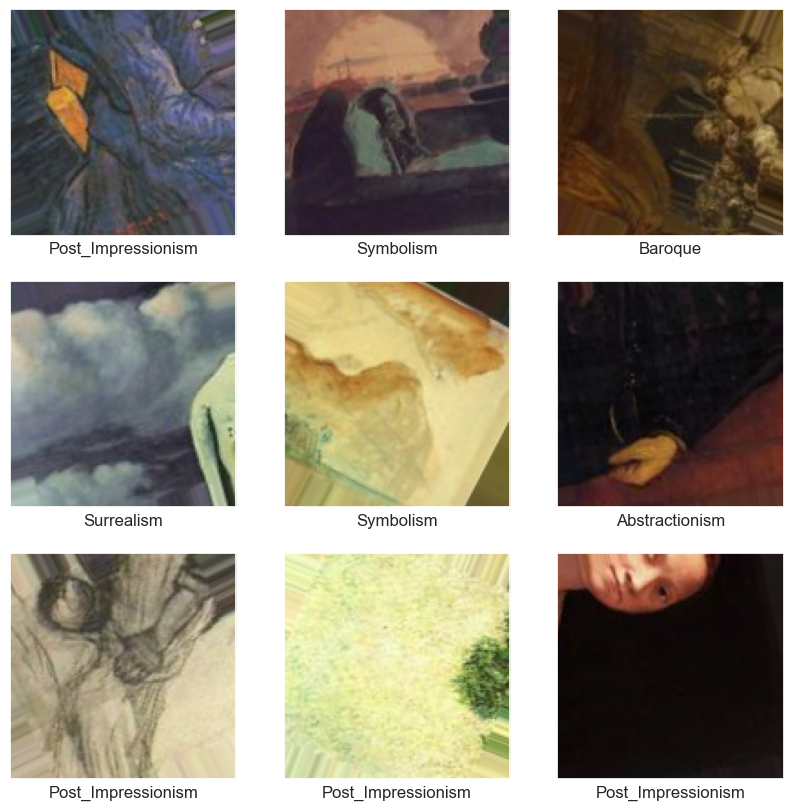

In [38]:
# define data preparation
datagen1 = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
plt.figure(figsize=(10,10))
plt.grid(False)
for X_batch1, y_batch1 in datagen1.flow(X_train, y_train, batch_size=500):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        #plt.subplot(330 + 1 + i)
        plt.imshow(X_batch1[i])
        plt.xlabel(class_names[y_batch1[i]])
# show the plot
    plt.show()
    break

C:\Users\sayur\AppData\Local\Temp\ipykernel_140872\3584136440.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


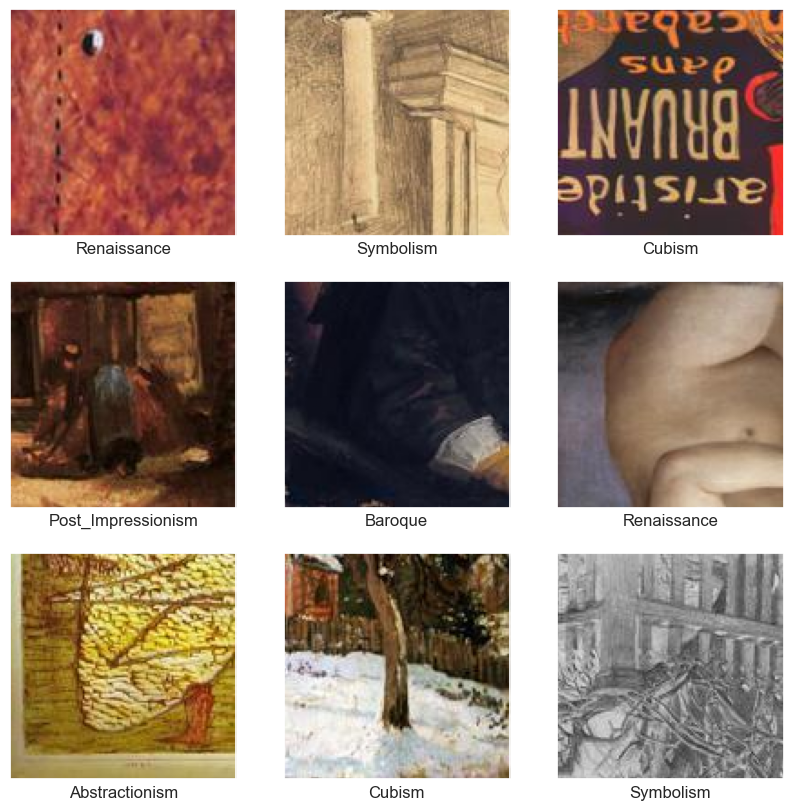

In [39]:
# define data preparation
datagen2 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
#datagen2.fit(X_train)
# configure batch size and retrieve one batch of images
plt.figure(figsize=(10,10))
plt.grid(False)
for X_batch2, y_batch2 in datagen2.flow(X_train, y_train, batch_size=255):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X_batch2[i])
        plt.xlabel(class_names[y_batch2[i]])
# show the plot
    plt.show()
    break

C:\Users\sayur\AppData\Local\Temp\ipykernel_140872\1663625697.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


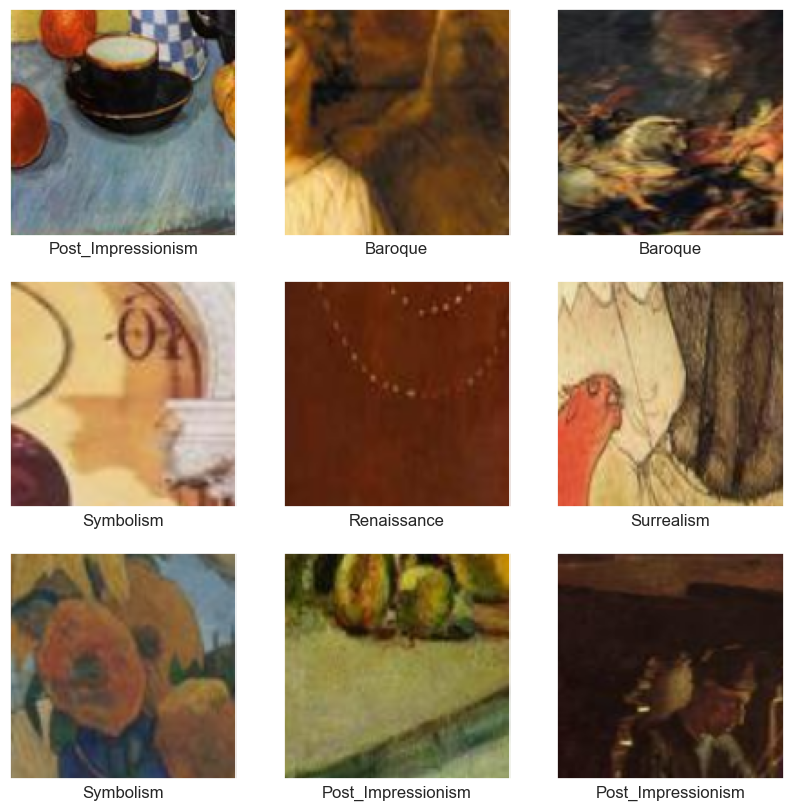

In [40]:
# define data preparation
datagen3 = ImageDataGenerator(zoom_range=[0.5,1.0])
# fit parameters from data
#datagen.fit(X_train)
# configure batch size and retrieve one batch of images
plt.figure(figsize=(10,10))
plt.grid(False)
for X_batch3, y_batch3 in datagen3.flow(X_train, y_train, batch_size=255):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X_batch3[i])
        plt.xlabel(class_names[y_batch3[i]])
# show the plot
    plt.show()
    break

In [41]:
print(X_train.shape, X_batch1.shape)
print(y_train.shape,y_batch1.shape)

(14544, 125, 125, 3) (500, 125, 125, 3)
(14544,) (500,)


In [42]:
import numpy as np
X_train2=np.append(X_train, X_batch1, axis=0)
X_train2=np.append(X_train2, X_batch2, axis=0)
X_train2=np.append(X_train2, X_batch3, axis=0)

In [43]:
y_train2=np.append(y_train, y_batch1, axis=0)
y_train2=np.append(y_train2, y_batch2, axis=0)
y_train2=np.append(y_train2, y_batch3, axis=0)

In [44]:
print(X_train2.shape,y_train2.shape)

(15554, 125, 125, 3) (15554,)


In [45]:
y_train2

array([4, 2, 3, ..., 4, 6, 6])

## Building the model

Steps to improve the model below:
* add transformations on images - Shuffle = True
* add layers
* change model

In [51]:
# show real time
num_classes = 7

model = keras.Sequential([
    keras.layers.Input(shape=(125, 125, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation='softmax')
])


In [47]:
# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(125,125,3)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),


#     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),


#     keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'), #activation: softmax, relu
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(7, activation='softmax')
# ])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 125, 125, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 123, 123, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,863,187 (10.92 MB)

 Trainable params: 2,863,181 (10.92 MB)

 Non-trainable params: 6 (24.00 B)

In [54]:
# optimizer="rmsprop", 'adam', opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.fit(X_train2, y_train2, epochs=30, validation_split=0.2,shuffle=True) #adding validation

Epoch 1/30


c:\Users\sayur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


389/389 ━━━━━━━━━━━━━━━━━━━━ 122s 287ms/step - accuracy: 0.2801 - loss: 2.2119 - val_accuracy: 0.3401 - val_loss: 1.8213
Epoch 2/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 104s 268ms/step - accuracy: 0.3474 - loss: 1.7453 - val_accuracy: 0.3687 - val_loss: 1.7069
Epoch 3/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 100s 258ms/step - accuracy: 0.3536 - loss: 1.6952 - val_accuracy: 0.3478 - val_loss: 1.7032
Epoch 4/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 104s 267ms/step - accuracy: 0.3625 - loss: 1.6655 - val_accuracy: 0.3841 - val_loss: 1.6581
Epoch 5/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 112s 287ms/step - accuracy: 0.3902 - loss: 1.6574 - val_accuracy: 0.3690 - val_loss: 1.6852
Epoch 6/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 135s 268ms/step - accuracy: 0.3824 - loss: 1.6617 - val_accuracy: 0.3571 - val_loss: 1.6818
Epoch 7/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 96s 248ms/step - accuracy: 0.4015 - loss: 1.6366 - val_accuracy: 0.4066 - val_loss: 1.6552
Epoch 8/30
389/389 ━━━━━━━━━━━━━━━━━━━━ 97s 250ms/step - accuracy: 0.4147 - loss: 1.6340

In [56]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

152/152 - 7s - 46ms/step - accuracy: 0.3950 - loss: 2.0382

Test accuracy: 0.39500823616981506


In [58]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [59]:
predictions = probability_model.predict(X_test)

152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step


In [60]:
predictions[0]

array([0.1377492 , 0.16205764, 0.12386117, 0.17754546, 0.14823204,
       0.12753244, 0.1230221 ], dtype=float32)

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

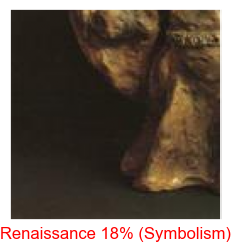

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  y_test)
plt.show()

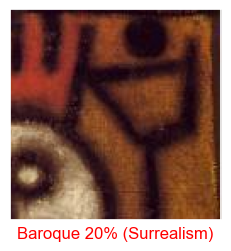

In [63]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  y_test)
plt.show()

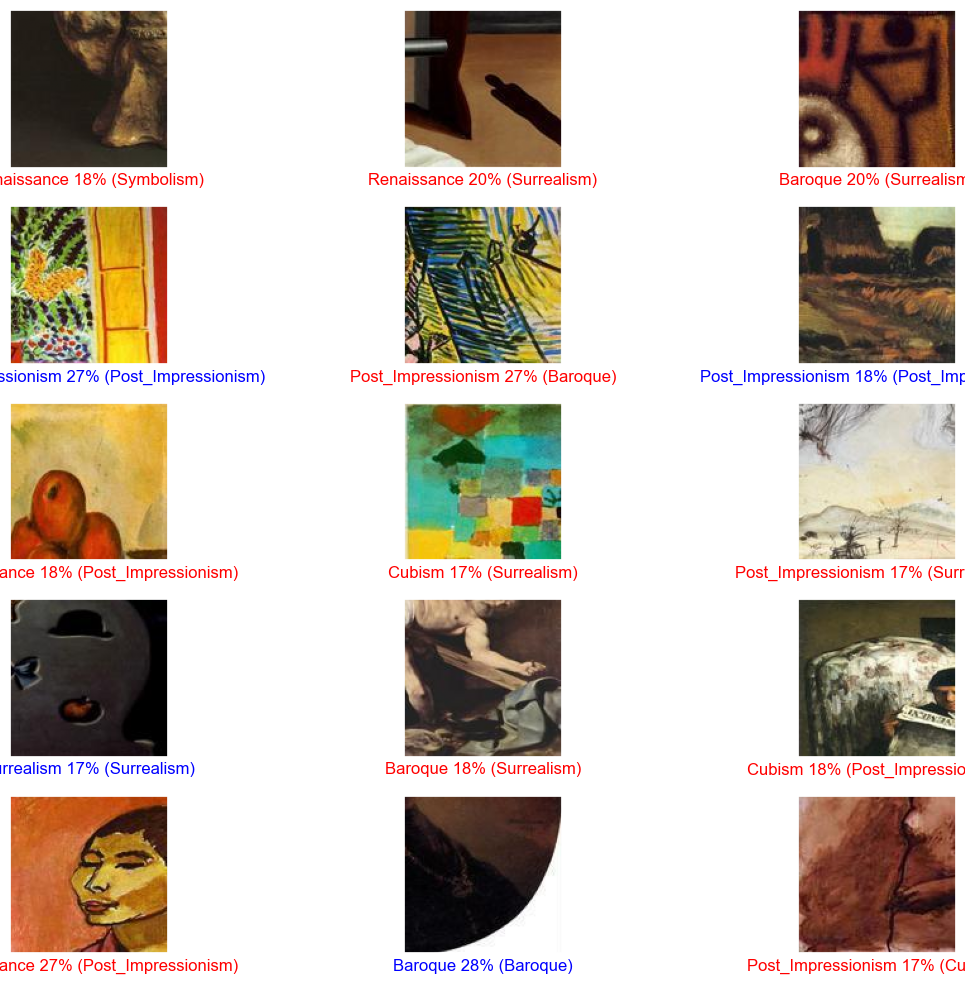

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    #plt.subplot(num_rows, 2*num_cols, 2*i+2)
    #plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
preds=model.predict(X_test)

152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step


In [67]:
from keras.utils import to_categorical
y_test2 = to_categorical(y_test)

In [68]:
preds.argmax(axis=1)

array([3, 3, 1, ..., 5, 4, 3], dtype=int64)

In [69]:
to_categorical(preds.argmax(axis=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
y_test

array([6, 5, 5, ..., 4, 4, 3])

In [71]:
y_test2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
# creating confusion matrix
array=confusion_matrix(y_test, preds.argmax(axis=1),labels=[0,1,2,3,4,5,6])

In [73]:
dct_class

{'Abstractionism': 0,
 'Baroque': 1,
 'Cubism': 2,
 'Renaissance': 3,
 'Post_Impressionism': 4,
 'Surrealism': 5,
 'Symbolism': 6}

In [74]:
df_cm = pd.DataFrame(array, range(7), range(7))
df_cm=df_cm.rename(index=dct_class)
df_cm=df_cm.rename(columns=dct_class)

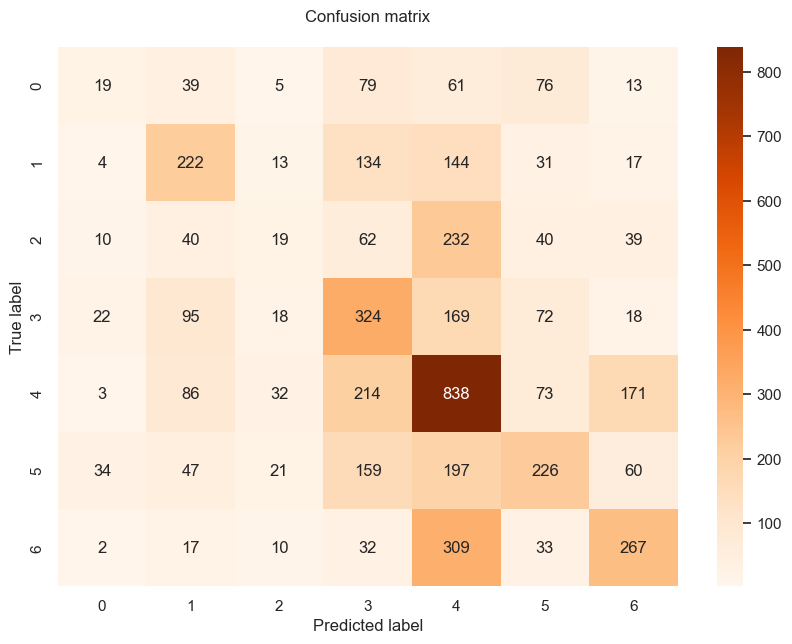

In [75]:
plt.figure(figsize=(10,7)) # for label size
plt.title("Confusion matrix"+"\n")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap='Oranges',fmt='g') # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
# save model
model.save('model_v0.h5')